<a href="https://colab.research.google.com/github/Wupadova/Machine-and-Deep-Learning-Mod.B-/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 4s 0us/step


Let's take a look at a sample of the images in the dataset:

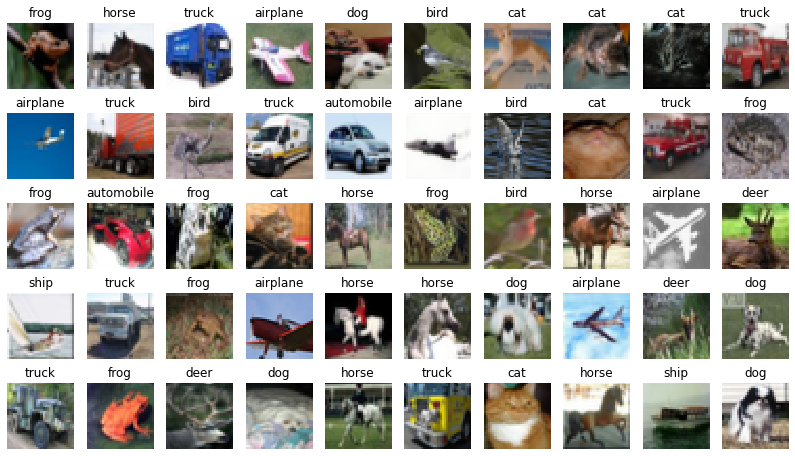

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


mean_X = np.mean(X_train, axis= 0)
std_X = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean_X) / std_X
X_valid_scaled = (X_valid - mean_X) / std_X
X_test_scaled = (X_test - mean_X) / std_X


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
352/352 [==============================] - 31s 88ms/step - loss: 1.4907 - accuracy: 0.4800 - val_loss: 1.2627 - val_accuracy: 0.5584
Epoch 2/10
352/352 [==============================] - 31s 87ms/step - loss: 1.1912 - accuracy: 0.5843 - val_loss: 1.1374 - val_accuracy: 0.5998
Epoch 3/10
352/352 [==============================] - 31s 87ms/step - loss: 1.0698 - accuracy: 0.6293 - val_loss: 1.0933 - val_accuracy: 0.6260
Epoch 4/10
352/352 [==============================] - 31s 88ms/step - loss: 0.9982 - accuracy: 0.6568 - val_loss: 1.0624 - val_accuracy: 0.6332
Epoch 5/10
352/352 [==============================] - 32s 91ms/step - loss: 0.9390 - accuracy: 0.6760 - val_loss: 1.0312 - val_accuracy: 0.6482
Epoch 6/10
352/352 [==============================] - 32s 90ms/step - loss: 0.8953 - accuracy: 0.6915 - val_loss: 1.0390 - val_accuracy: 0.6490
Epoch 7/10
352/352 [==============================] - 30s 86ms/step - loss: 0.8573 - accuracy: 0.7052 - val_loss: 1.0293 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 1.0233 - accuracy: 0.6511 - 2s/epoch - 8ms/step
accuracy: 65.11%


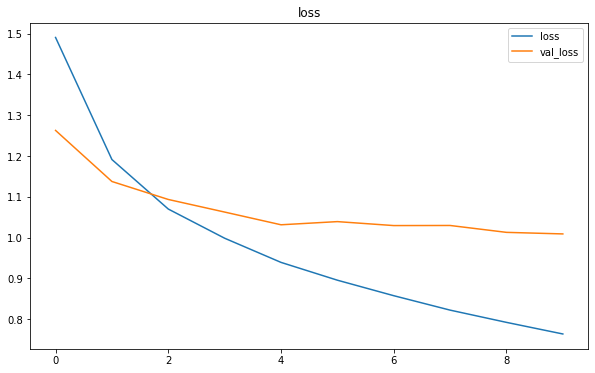

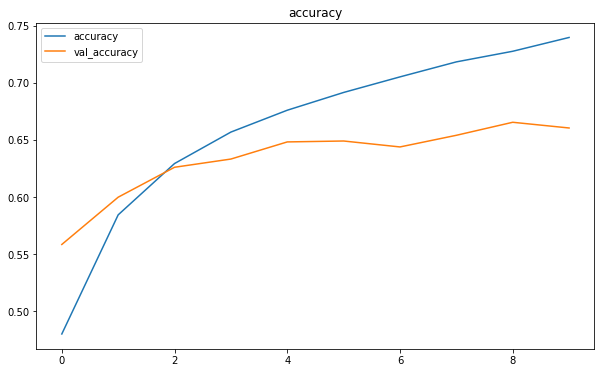

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

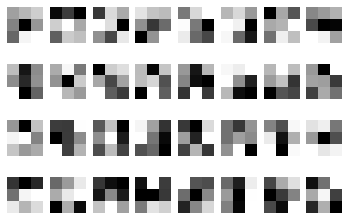

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1
2.   [TO COMPLETE] Answer to question 2

1. For the first Conv2D layer, we have a kernel size of 3X3 and input has 3 different channels, furthermore, as we have 32 different filters, hence we will get 32 different feature maps as the output and for each output feature map, we have 1 bias, hence, we have a total parameters of (3 * 3 * 3 + 1) * 32 = 896. Similarly, for the second convolutional layer, we have (2 * 2 * 32 + 1) * 16 = 2064.

2. We can see that the difference are the kernel size, number of the input and output feature maps, since for the first convolutional layer we have kernel size of 3x3 and for the second one we have 2x2, even though it contributes to part of the difference of the learnable parameters, however, most of the differences are due to the difference of the number of input layers . The number of input for the first one is 3 (channels) and for the second one we have 32 input layers, as for the number of filters, the first convolutional layer has 32 filters and the second one has 16 filters.  Which in the end, even though the second convolutional layer has a smaller amount of fiters, but the number of the difference between the input layers is significantly larger, hence, overall, we have way more parameters for the second convolutional layer.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 40s 112ms/step - loss: 1.5982 - accuracy: 0.4333 - val_loss: 1.3446 - val_accuracy: 0.5362
Epoch 2/10
352/352 [==============================] - 34s 95ms/step - loss: 1.2804 - accuracy: 0.5522 - val_loss: 1.2363 - val_accuracy: 0.5616
Epoch 3/10
352/352 [==============================] - 34s 97ms/step - loss: 1.1749 - accuracy: 0.5912 - val_loss: 1.1284 - val_accuracy: 0.6054
Epoch 4/10
352/352 [==============================] - 34s 95ms/step - loss: 1.1043 - accuracy: 0.6167 - val_loss: 1.0863 - val_accuracy: 0.6260
Epoch 5/10
352/352 [==============================] - 34s 97ms/step - loss: 1.0553 - accuracy: 0.6355 - val_loss: 1.0748 - val_accuracy: 0.6300
Epoch 6/10
352/352 [==============================] - 35s 99ms/step - loss: 1.0126 - accuracy: 0.6506 - val_loss: 1.0274 - val_accuracy: 0.6474
Epoch 7/10
352/352 [==============================] - 34s 98ms/step - loss: 0.9877 - accuracy: 0.6611 - val_loss: 1.0012 - val_accuracy

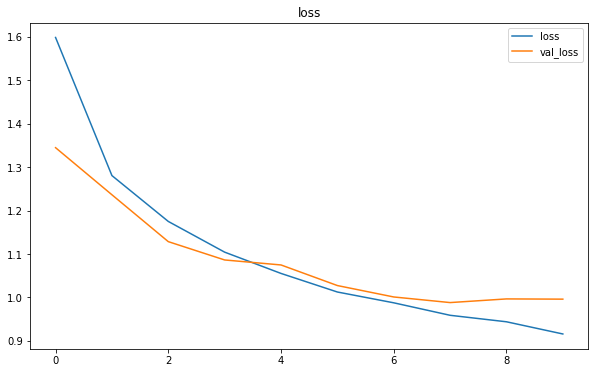

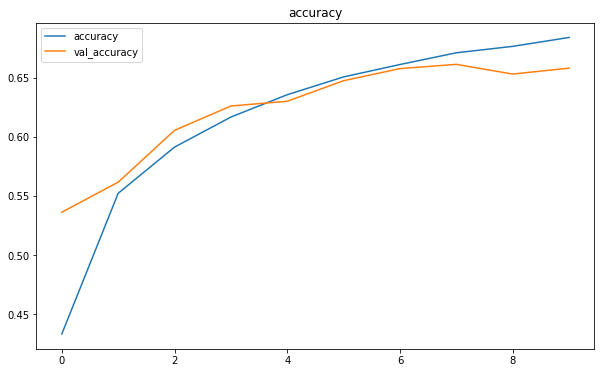

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Epoch 1/10
352/352 [==============================] - 43s 121ms/step - loss: 1.7706 - accuracy: 0.3532 - val_loss: 1.5316 - val_accuracy: 0.4498
Epoch 2/10
352/352 [==============================] - 39s 112ms/step - loss: 1.4416 - accuracy: 0.4780 - val_loss: 1.3729 - val_accuracy: 0.5110
Epoch 3/10
352/352 [==============================] - 41s 118ms/step - loss: 1.3430 - accuracy: 0.5179 - val_loss: 1.3069 - val_accuracy: 0.5362
Epoch 4/10
352/352 [==============================] - 43s 123ms/step - loss: 1.2751 - accuracy: 0.5455 - val_loss: 1.2456 - val_accuracy: 0.5632
Epoch 5/10
352/352 [==============================] - 42s 119ms/step - loss: 1.2244 - accuracy: 0.5664 - val_loss: 1.2181 - val_accuracy: 0.5704
Epoch 6/10
352/352 [==============================] - 39s 112ms/step - loss: 1.1778 - accuracy: 0.5848 - val_loss: 1.1595 - val_accuracy: 0.5870
Epoch 7/10
352/352 [==============================] - 38s 109ms/step - loss: 1.1402 - accuracy: 0.5992 - val_loss: 1.1519 - val_ac

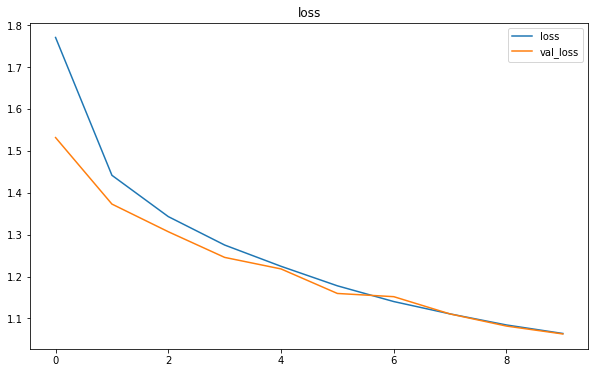

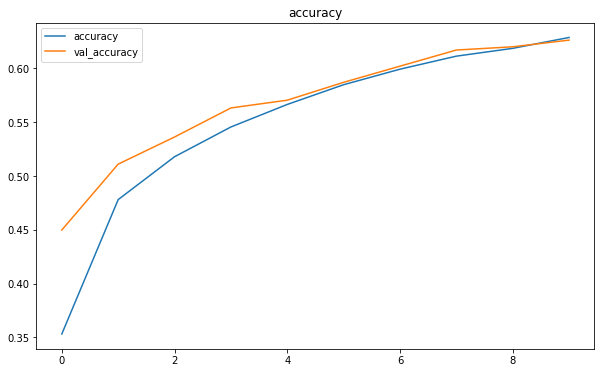

In [ ]:
# change the number of convolutional layer

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 42s 119ms/step - loss: 1.6452 - accuracy: 0.4041 - val_loss: 1.3968 - val_accuracy: 0.5080
Epoch 2/10
352/352 [==============================] - 42s 119ms/step - loss: 1.3196 - accuracy: 0.5310 - val_loss: 1.2309 - val_accuracy: 0.5682
Epoch 3/10
352/352 [==============================] - 42s 119ms/step - loss: 1.2007 - accuracy: 0.5812 - val_loss: 1.1674 - val_accuracy: 0.5942
Epoch 4/10
352/352 [==============================] - 42s 120ms/step - loss: 1.1316 - accuracy: 0.6071 - val_loss: 1.1275 - val_accuracy: 0.6120
Epoch 5/10
352/352 [==============================] - 42s 120ms/step - loss: 1.0899 - accuracy: 0.6233 - val_loss: 1.0731 - val_accuracy: 0.6258
Epoch 6/10
352/352 [==============================] - 42s 120ms/step - loss: 1.0599 - accuracy: 0.6338 - val_loss: 1.0721 - val_accuracy: 0.6306
Epoch 7/10
352/352 [==============================] - 44s 124ms/step - loss: 1.0313 - accuracy: 0.6425 - val_loss: 1.0510 - val_ac

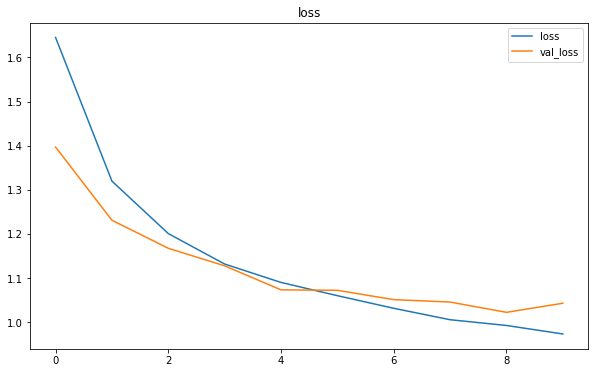

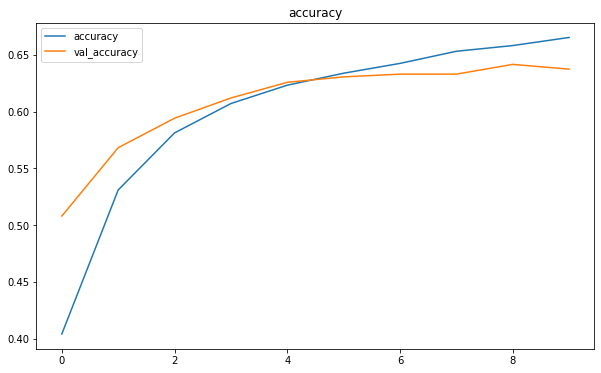

In [ ]:
# change the kernel size of the first layer  larger kernel

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[5,5], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 32s 90ms/step - loss: 1.6487 - accuracy: 0.4124 - val_loss: 1.3764 - val_accuracy: 0.5132
Epoch 2/10
352/352 [==============================] - 32s 91ms/step - loss: 1.3083 - accuracy: 0.5407 - val_loss: 1.2448 - val_accuracy: 0.5652
Epoch 3/10
352/352 [==============================] - 32s 92ms/step - loss: 1.1911 - accuracy: 0.5850 - val_loss: 1.1355 - val_accuracy: 0.6020
Epoch 4/10
352/352 [==============================] - 32s 91ms/step - loss: 1.1207 - accuracy: 0.6105 - val_loss: 1.0911 - val_accuracy: 0.6256
Epoch 5/10
352/352 [==============================] - 32s 91ms/step - loss: 1.0716 - accuracy: 0.6299 - val_loss: 1.0728 - val_accuracy: 0.6338
Epoch 6/10
352/352 [==============================] - 32s 92ms/step - loss: 1.0387 - accuracy: 0.6412 - val_loss: 1.0404 - val_accuracy: 0.6428
Epoch 7/10
352/352 [==============================] - 32s 91ms/step - loss: 1.0094 - accuracy: 0.6518 - val_loss: 1.0314 - val_accuracy:

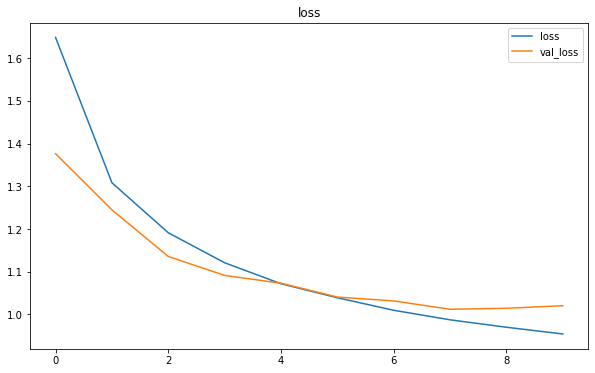

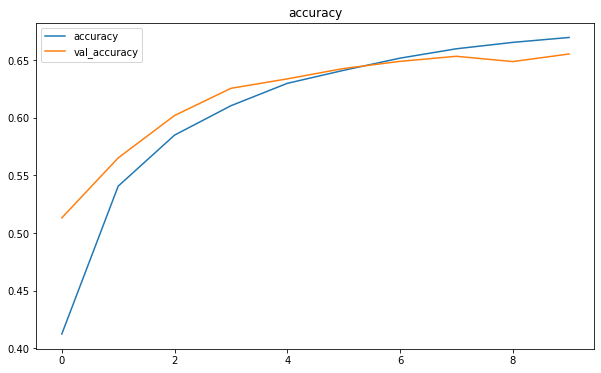

In [ ]:
# change the kernel size of the first layer smaller kernel

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 68s 193ms/step - loss: 1.6080 - accuracy: 0.4241 - val_loss: 1.3591 - val_accuracy: 0.5222
Epoch 2/10
352/352 [==============================] - 67s 190ms/step - loss: 1.3095 - accuracy: 0.5378 - val_loss: 1.2837 - val_accuracy: 0.5470
Epoch 3/10
352/352 [==============================] - 67s 191ms/step - loss: 1.2071 - accuracy: 0.5773 - val_loss: 1.1836 - val_accuracy: 0.5848
Epoch 4/10
352/352 [==============================] - 66s 187ms/step - loss: 1.1245 - accuracy: 0.6100 - val_loss: 1.1502 - val_accuracy: 0.6070
Epoch 5/10
352/352 [==============================] - 65s 184ms/step - loss: 1.0686 - accuracy: 0.6308 - val_loss: 1.0555 - val_accuracy: 0.6370
Epoch 6/10
352/352 [==============================] - 65s 185ms/step - loss: 1.0236 - accuracy: 0.6488 - val_loss: 1.0514 - val_accuracy: 0.6344
Epoch 7/10
352/352 [==============================] - 65s 185ms/step - loss: 0.9853 - accuracy: 0.6612 - val_loss: 1.0037 - val_ac

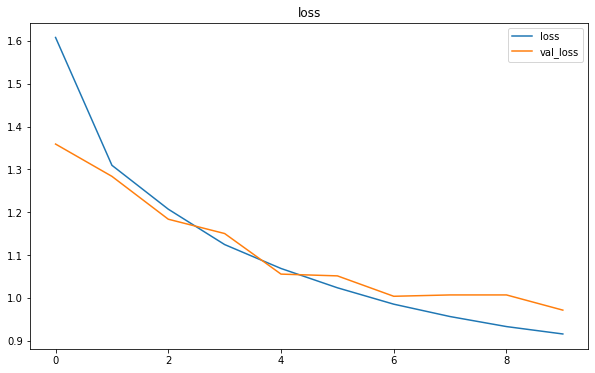

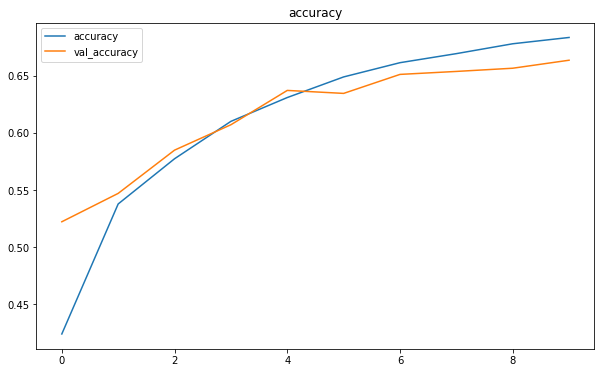

In [ ]:
# change the kernel size of the second layer

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 62s 174ms/step - loss: 1.5935 - accuracy: 0.4270 - val_loss: 1.3254 - val_accuracy: 0.5338
Epoch 2/10
352/352 [==============================] - 58s 165ms/step - loss: 1.2548 - accuracy: 0.5595 - val_loss: 1.1945 - val_accuracy: 0.5730
Epoch 3/10
352/352 [==============================] - 58s 164ms/step - loss: 1.1367 - accuracy: 0.6057 - val_loss: 1.1560 - val_accuracy: 0.5872
Epoch 4/10
352/352 [==============================] - 58s 164ms/step - loss: 1.0669 - accuracy: 0.6290 - val_loss: 1.0421 - val_accuracy: 0.6372
Epoch 5/10
352/352 [==============================] - 57s 163ms/step - loss: 1.0153 - accuracy: 0.6477 - val_loss: 1.0033 - val_accuracy: 0.6550
Epoch 6/10
352/352 [==============================] - 60s 169ms/step - loss: 0.9735 - accuracy: 0.6622 - val_loss: 0.9908 - val_accuracy: 0.6616
Epoch 7/10
352/352 [==============================] - 59s 167ms/step - loss: 0.9472 - accuracy: 0.6707 - val_loss: 0.9912 - val_ac

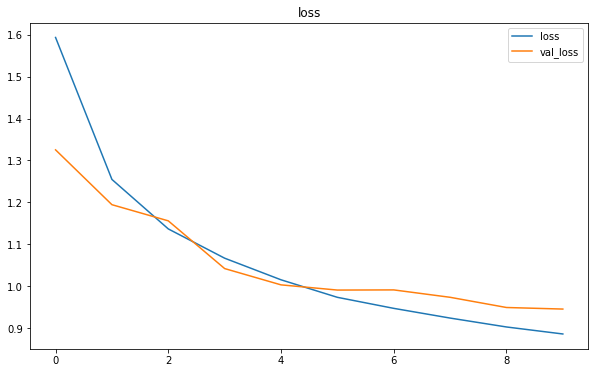

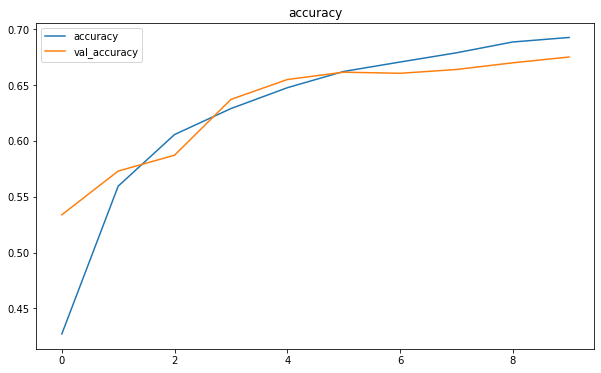

In [ ]:
# change the number of feature maps for the first convolutional layer

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
# change the number of feature maps for the second convolutional layer

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 10)              

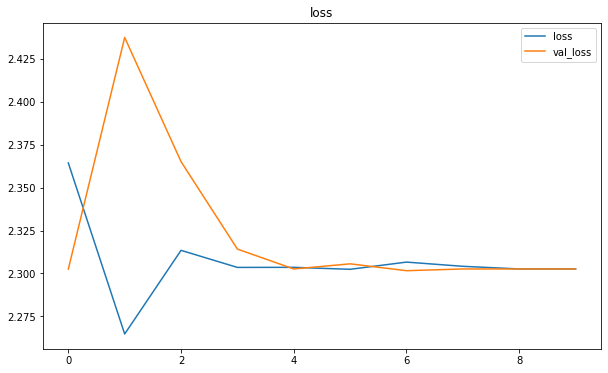

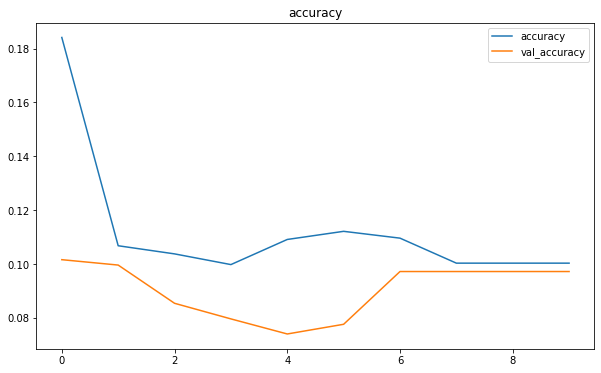

In [ ]:
# change the activation function

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='LeakyReLU', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/15
352/352 [==============================] - 34s 95ms/step - loss: 1.5946 - accuracy: 0.4312 - val_loss: 1.3397 - val_accuracy: 0.5264
Epoch 2/15
352/352 [==============================] - 34s 97ms/step - loss: 1.2799 - accuracy: 0.5486 - val_loss: 1.2246 - val_accuracy: 0.5732
Epoch 3/15
352/352 [==============================] - 35s 98ms/step - loss: 1.1827 - accuracy: 0.5875 - val_loss: 1.1473 - val_accuracy: 0.6034
Epoch 4/15
352/352 [==============================] - 34s 98ms/step - loss: 1.1095 - accuracy: 0.6147 - val_loss: 1.0916 - val_accuracy: 0.6178
Epoch 5/15
352/352 [==============================] - 34s 98ms/step - loss: 1.0593 - accuracy: 0.6326 - val_loss: 1.0700 - val_accuracy: 0.6348
Epoch 6/15
352/352 [==============================] - 34s 96ms/step - loss: 1.0164 - accuracy: 0.6467 - val_loss: 1.0531 - val_accuracy: 0.6400
Epoch 7/15
352/352 [==============================] - 34s 96ms/step - loss: 0.9864 - accuracy: 0.6577 - val_loss: 1.0180 - val_accuracy:

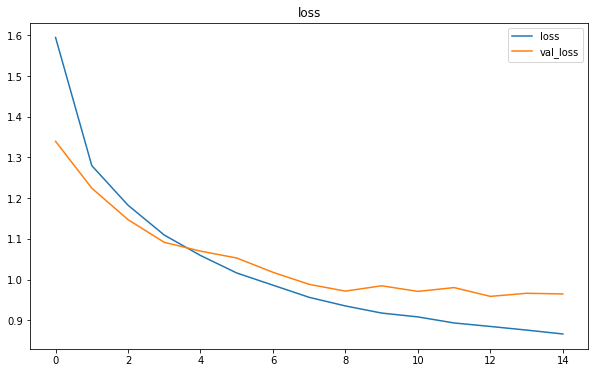

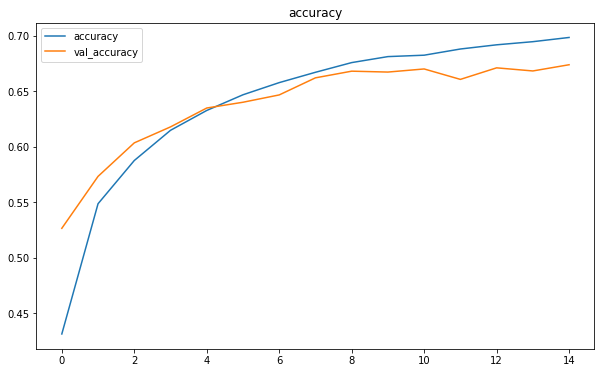

In [ ]:
# change the number of epochs

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
176/176 [==============================] - 31s 176ms/step - loss: 1.6942 - accuracy: 0.3924 - val_loss: 1.3894 - val_accuracy: 0.5110
Epoch 2/10
176/176 [==============================] - 32s 182ms/step - loss: 1.3262 - accuracy: 0.5344 - val_loss: 1.2515 - val_accuracy: 0.5634
Epoch 3/10
176/176 [==============================] - 33s 185ms/step - loss: 1.2173 - accuracy: 0.5756 - val_loss: 1.1797 - val_accuracy: 0.5858
Epoch 4/10
176/176 [==============================] - 32s 184ms/step - loss: 1.1453 - accuracy: 0.6025 - val_loss: 1.1053 - val_accuracy: 0.6196
Epoch 5/10
176/176 [==============================] - 32s 184ms/step - loss: 1.0988 - accuracy: 0.6183 - val_loss: 1.0866 - val_accuracy: 0.6238
Epoch 6/10
176/176 [==============================] - 32s 184ms/step - loss: 1.0605 - accuracy: 0.6350 - val_loss: 1.0756 - val_accuracy: 0.6248
Epoch 7/10
176/176 [==============================] - 33s 185ms/step - loss: 1.0298 - accuracy: 0.6442 - val_loss: 1.0516 - val_ac

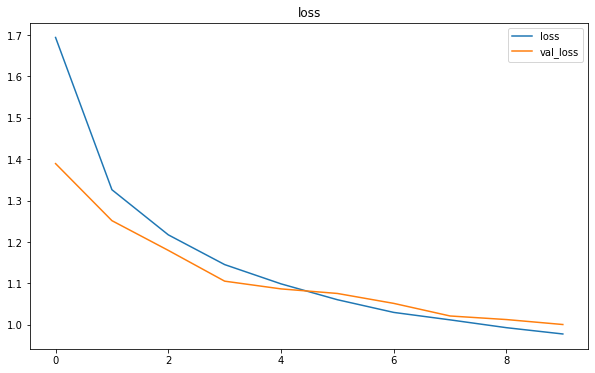

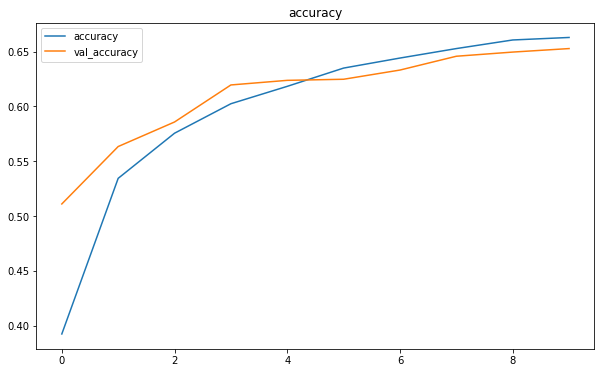

In [ ]:
# change the number of batch size

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=256,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 10)              

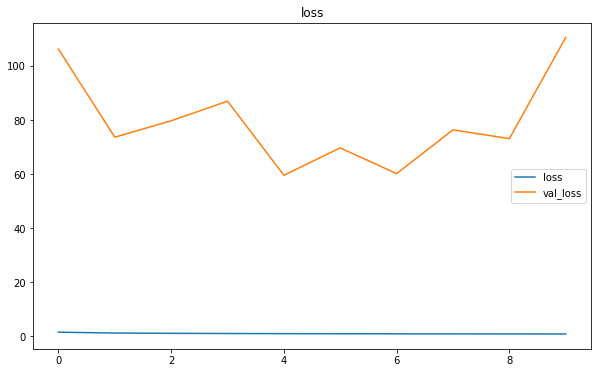

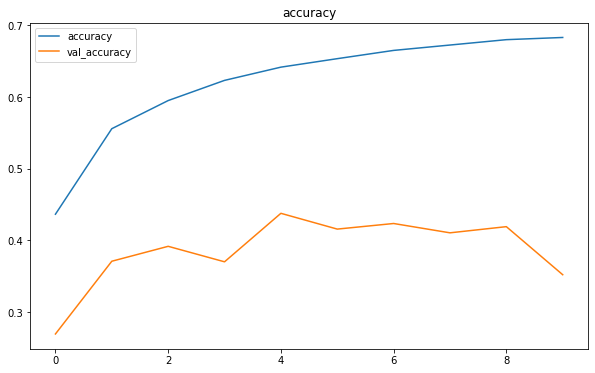

In [ ]:
# change the optimizer

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found ...[TO COMPLETE]

The achieved accuracy in the test set is ...[TO COMPLETE]

Discussion:
[TO COMPLETE]

Besides, I tested also other models: 
* [TO COMPLETE]
* ..


Discussion:
[TO COMPLETE]

In [ ]:
1. A model with one more convolutional layer, howerver, the result is really un-satisfying, as the performance is worse, furthermore, since it has one more layer, the result shows a strong overfitting pattern.
2. The second model is to change the kernel size or the filter size, however, it also cannot give a good performance.
3

In [ ]:
# change the number of feature maps for the second cov layer